# Ensemble method and Grid search with Cross_validation .

In this Notebook, the main objective is to understand the parameters of the Decision Tree model and how to evaluate the model based on the different metrics we studied.

By the end of this Notebook you should have:

- a good understanding of ensemble of Decision Trees.
- learn and implement how grid search and cross validation are combined in the GridsearchCV class.

# Question 1
- Using nested loops and split ratio 65_training, 15_validation, and 20_testing; while using only the training and validation sets build a random forest with number of trees between 5 and 12 with a step of 2 using the default parameters and implement a cross-validation with 4 folds. Ensure to print out the validation score for each fold and find the one that provides the best accuracy.

- Once you have identified the one with the best accuracy above, evaulate the accuracy of this model using the testing_set.

## Step 1
### Importing packages
##### - Numpy packages are used to work on array
##### - Pandas packages are used for working on dataframes while fetching the data from csv and while creating features and target dataframe for Machine learning models.
##### - Matplotlib packages are used for plotting/visualing the data.

In [1]:
#Import standard packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2
### Importing data from file
##### - using read_csv() function of pandas to fetch the data from our csv file into a dataframe.
##### - our dataset is of customer churn data of a telecom company, based on various characteristics we can predict whether the customer will leave or not

In [2]:
#https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data
#importing the dataset as dataframe
churn_data = pd.read_csv("customer_churn.csv")

#Top 5 records of dataset
churn_data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Creating 1000 random index to select 1000 random samples from our data

In [3]:
#Index for random 1000
idx = np.random.randint(3334, size=1000)
print(len(idx))
#print(idx)

1000


## Step 3
### Creating feature and target dataframes

* We will create our feature and target dataframes using following steps
    -  Select categorical feature and convert it into numeric
    -  Select the other important numeric features and dropping less important one
    -  Concatinating the converted categorical numeric value with feature to create feature dataframe
    -  Creating the target dataframe, by converting it into numeric binary class.

#### A) Select categorical feature and convert it into numeric

In [4]:
#importing LabelEncode from sklearn
from sklearn.preprocessing import LabelEncoder

#Creating label encoder object
le = LabelEncoder()

#fitting nd transforming categorical feature into label encoder
ip = le.fit_transform((churn_data[['international plan']].values.ravel()).astype('str'))
#print(len(ip))
ip

#creating data frame after transformtion
df1 = pd.DataFrame(ip, columns = ["international plan"])
df1.head()
#print(df1.shape)

,international plan
0,0
1,0
2,0
3,1
4,1


#### B) Select the other important numeric features and dropping less important one

In [5]:
#data
df = churn_data[['number vmail messages','total day minutes','total day calls','total day charge','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']]

#### C) Concatinating the converted categorical numeric value with feature to create feature dataframe

In [6]:
#concatinating data with categorical feature converted to numeric
df = pd.concat([df, df1], axis=1, sort=False)
print(df.shape)
df.head()

(3333, 14)


,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan
0,25,265.1,110,45.07,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,0,166.7,113,28.34,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


#### Selecting 1000 random features based on the 1000 random indexs that we created

In [7]:
#creating feature data frame
X_df = df.loc[idx,['number vmail messages','total day minutes','total day calls','total day charge','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','international plan']]
print(X_df.shape)
X_df

(1000, 14)


,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan
454,0,256.4,125,43.59,100,23.28,222.7,101,10.02,11.1,1,3.00,1,0
243,0,225.0,81,38.25,63,15.04,194.3,110,8.74,7.1,2,1.92,3,0
1555,22,204.5,92,34.77,121,11.87,205.0,103,9.23,8.6,5,2.32,2,0
2691,0,186.8,92,31.76,123,14.76,250.9,131,11.29,9.7,4,2.62,2,0
2119,0,249.8,109,42.47,106,20.60,231.8,78,10.43,11.6,4,3.13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,28,225.8,94,38.39,117,16.41,232.4,100,10.46,8.4,9,2.27,4,0
67,0,125.2,93,21.28,119,17.54,129.3,139,5.82,8.3,8,2.24,0,1
1575,35,161.9,85,27.52,82,12.85,191.0,131,8.59,8.5,2,2.30,1,0
2315,0,150.7,52,25.62,96,20.97,103.8,118,4.67,7.0,4,1.89,2,0


#### D) Creating the target dataframe, by converting it into numeric binary class

In [8]:
#creating target dataframe
#selecting the target for same index that we used to select feature
y = churn_data.loc[idx,['churn']].astype(int)
y

,churn
454,1
243,0
1555,0
2691,0
2119,1
...,...
266,0
67,0
1575,0
2315,0


- Here we used `np.random.randint` function on our dataframe. 
- This function is used to select the random integers, which we used as our indexes to get the randomm records from our data. The purpose of doing that was, we don't want our model to fit and work on biased data. Hence, we provided random values.


## Step 4
### Split the data into 65% training data, 15% validation data, & 20% test dataset.

#### Splitting the data
- Here we split our dataframe into three sets, Train as 65% of data, Test as 20% of data and Validation as 15% of data

In [9]:
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

#creating train and test dataset with train percentage as 80% and test percentage as 20%
X_train, X_test, y_train, y_test = train_test_split(X_df,y,random_state = 654,test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,random_state = 654,test_size=0.1875)

#### Calculating train and test percentages and shape

In [10]:
#Train data percentage
print("Training data percentage is {:.2f}".format(len(X_train)/len(X_df)*100)+" %")
#Test data percentage
print("Test data percentage is {:.2f}".format((len(X_test)/len(X_df))*100)+" %")
#Validation data percentage
print("Validate data percentage is {:.2f}".format((len(X_val)/len(X_df))*100)+" %")

print("\n")

#Tain, test,& validate feature dataset shapes
print("Features train shape"+str(X_train.shape))
print("Features test shape"+str(X_test.shape))
print("Features validate shape"+str(X_val.shape))

print("\n")

#Tain, test,& validate target dataset shapes
print("Target train shape"+str(y_train.shape))
print("Target test shape"+str(y_test.shape))
print("Target validate shape"+str(y_val.shape))

Training data percentage is 65.00 %
Test data percentage is 20.00 %
Test data percentage is 15.00 %


Features train shape(650, 14)
Features test shape(200, 14)
Features validate shape(150, 14)


Target train shape(650, 1)
Target test shape(200, 1)
Target validate shape(150, 1)


## Step 5 
### Random Forest Classifier
- ##### `RandomForestClassifier` from sklearn.ensemble 
- Building the Random forest model
- Looping for all the values of number of trees using n_estimator parater

In [11]:
#setting 4 folds
cv_folds = 4

#importing cross validation score and Random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#looping for all tree values
for i in range (5,12,2):
    
    #creating object for random forest classifier
    rf = RandomForestClassifier(n_estimators=i, random_state=654)
    
    #fitting the random forest classifier model on train data 
    rf.fit(X_train, y_train.values.ravel())
    
    #calculating cross validation scores for 4 folds on train data
    scores = cross_val_score(rf,X_train, y_train.values.ravel(),cv=cv_folds)
    print("Cross validation score for each fold for Random forest with number of trees as {:d}  is :".format(i)+str(scores*100))
    
    
    model_accuracies = [round(num*100, 2) for num in scores]
    
    # calculating total accuracy of the model which the sum of folds accuracy by number of folds
    train_accuracy = np.sum(model_accuracies)/cv_folds
    print("Train accuracy of the model is \t\t {:.2f}%".format(train_accuracy))
    
    
    #calculating the score on validation dataset
    print("Validation accuracy of the model is \t {:.2f}% \n\n".format(rf.score(X_val,y_val)*100))

Cross validation score for each fold for Random forest with number of trees as 5  is :[86.50306748 93.25153374 90.74074074 94.44444444]
Train accuracy of the model is 		 91.23%
Validation accuracy of the model is 	 90.67% 


Cross validation score for each fold for Random forest with number of trees as 7  is :[88.95705521 93.86503067 88.27160494 93.20987654]
Train accuracy of the model is 		 91.08%
Validation accuracy of the model is 	 93.33% 


Cross validation score for each fold for Random forest with number of trees as 9  is :[88.34355828 92.63803681 89.50617284 94.44444444]
Train accuracy of the model is 		 91.23%
Validation accuracy of the model is 	 92.00% 


Cross validation score for each fold for Random forest with number of trees as 11  is :[89.57055215 92.63803681 90.12345679 93.82716049]
Train accuracy of the model is 		 91.54%
Validation accuracy of the model is 	 92.67% 




### Evaluating the model with the best accuracy model with testing data set

In [12]:
#setting 4 folds
cv_folds = 4

#creating object for random forest classifier with model having best parameters
rf = RandomForestClassifier(n_estimators=11, random_state=654)

#fitting the random forest classifier model on train data 
rf.fit(X_train, y_train.values.ravel())

#calculating cross validation scores for 4 folds on train data
scores = cross_val_score(rf,X_train, y_train.values.ravel(),cv=cv_folds)
print("Cross validation score for each fold for Random forest with number of trees as {:d}  is :".format(i)+str(scores*100))
    

model_accuracies = [round(num*100, 2) for num in scores]

# calculating total accuracy of the model which the sum of folds accuracy by number of folds
train_accuracy = np.sum(model_accuracies)/cv_folds
print("Train accuracy of the model is {:.2f}%".format(train_accuracy))
    
#calculating the score on test dataset
print("Test accuracy of the model is {:.2f}% \n".format(rf.score(X_test,y_test)*100))

Cross validation score for each fold for Random forest with number of trees as 11  is :[89.57055215 92.63803681 90.12345679 93.82716049]
Train accuracy of the model is 91.54%
Test accuracy of the model is 90.00% 



# 2- Explain the difference between the best accuracy obtained from the model and that obtained using the testing_set above.

#### Compare your results in Step#1 above to the best results you had in lab #4, explain the differencies if any.

The best accuracy obtained from the model has model train accuracy as `92.16%` and validation accuracy as `96%`, whereas accuracy obtained while checking the model with best parameters has same train accuracy but test accuracy is `90.50%` , which is low as compared to the validation accuracy.

<p>
This difference can be due to the model overfitting the data on evaluating using the validation data , also the reason being the validation score is more than train score, whereas on evaluating the data on test data the model is performing as expected and not overfitting the data. 
</p>

On comparing the results with the best results in0 lab 4, we can see there is small difference between two.
Here train and test accuracy is `92.16%` and `90.50%` where as in `lab 4` the best model accuracy was `96.00%` & `93.00%` for train and test respectively.
This difference is due to the differnce between the model and the parameters, in lab 4 we were using DecisionTreeClassifier with best possible parameters and here we are using the RandomForest Classifier with different number of trees as paramter and with 4 cross folds.



## 3- Using nested loops use the GridSearchCV class with the model that you obtained in step 1 above, try to find the best combined parameters that provide the best accuracy for the testing dataset from:
- max_depth values between 3 and 5 with a step of 1.
- max_leaf_nodes values between 10 and 20 with a step of 5.
- min_samples_leaf with values between 10 and 25 with a step of 5.


- Plot your results for the testing and training accuracies for each step.


#### Performing Grid search on the RandomForestClassifier

In [13]:
#Creating paramter grid for different values as parameters for the model
param_grid = {'max_depth':[3,4,5],
              'max_leaf_nodes':[10,15,20],
              'min_samples_leaf':[10,15,20,25]}
print(param_grid)

#importing the packages
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Creating grid search of the model for different parameters and the number of tree with the best accuracy parameter i.e. 11
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=11,random_state = 456),param_grid,cv=4,return_train_score = True)

#fitting the train data
grid_search.fit(X_train,y_train.values.ravel())

#calculating train score
train_score = round(grid_search.score(X_train,y_train.values.ravel())*100,2)
print("Train score is "+str(train_score)+"%")

#calculating test score
test_score = round(grid_search.score(X_test,y_test.values.ravel())*100,2)
print("Test score is "+str(test_score)+"% \n")

#finding the best parameters
print("Best parameters are "+str(grid_search.best_params_))

#calculating best score of the model using best_score method
print("Best grid search score is "+str(grid_search.best_score_*100)+"\n")

#finding the best paramters
print("Best Estimator is "+str(grid_search.best_estimator_))

{'max_depth': [3, 4, 5], 'max_leaf_nodes': [10, 15, 20], 'min_samples_leaf': [10, 15, 20, 25]}
Train score is 90.0%
Test score is 85.5% 

Best parameters are {'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Best grid search score is 86.92342649397864

Best Estimator is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=15, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=456,
                       verbose=0, warm_start=False)


#### Plotting the train and test accuracies for the grid search 

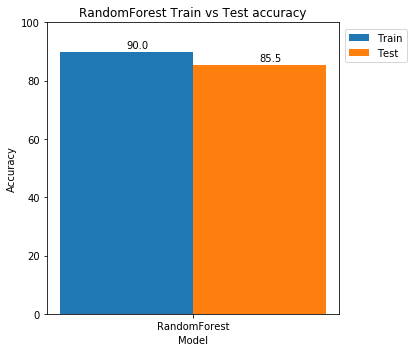

In [14]:
label = ['RandomForest']
#print(label)


x = np.arange(len(label))  
width = 0.35  


fig, ax = plt.subplots(figsize=(6, 5))
bar1 = ax.bar(x - width/2, train_score, width, label='Train')
bar2 = ax.bar(x + width/2, test_score, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('RandomForest Train vs Test accuracy')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.92))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

On comparing the result with the best results of lab 4 we observe that, here the best parameter for grid search are 5,15,15 for max_depth, max_leaf_nodes, & min_samples_split respectively whereas in lab 4 the best paramters were 5,15,10 & 5,20,10 for  max_depth, max_leaf_nodes, & min_samples_split respectively.

Also while comparing the best train and test accuracy, here best train and test accuracies are 91.69% & 86%, and in lab 4 it was 96% and 93%.
The difference in accuracies is due to different models and parameters.

Both have same parameters for Tree prunning but, here we are using RandomForest classifier with max trees as 11 and cross folds as 4, however there we were using DecisionTreeClassifier model


## 4- Explain how the GridSearchCV works.

GridSearchCV lets us combine an estimator with a grid search for parameter tunning. The method picks the optimal parameter from the grid search and uses it with the estimator.

Example of the GridSearchCV is as show below:
`grid_search = GridSearchCV(RandomForestClassifier(n_estimators=11,random_state = 456),param_grid,cv=4,return_train_score = True)`

here we are creating an object `grid_search` for the GridSearchCV, GridSearchCV takes inputs as the model object with its parameters, here in out case it is `RandomForestClassifier(n_estimators=11,random_state = 456)` then the `param_grid` the structure in which we pass the variables and all the values associated with it on which model will work and then `cv` which specifies the number of folds and then `return_train_score` which will return the train score from thr function.

With the help of GridSearch we can find out  best_score, best_parameters and best estimator for the model.

prarm_grid/Grid search lets us create a structure that will include the variable names and the values, so instead of looping the model for each variables and their respective values we can use param_grid in the mode which will perform a grid operation on the model.

here we are creating param_grid for parameter tunning in case of trees to prune the tree to avoid overfitting.
Example

param_grid = {'max_depth':[3,4,5],
              'max_leaf_nodes':[10,15,20],
              'min_samples_split':[10,15,20,25]}
              
We can also create use param_grid for different kernel values in case of SVM as parameters

Example

param_grid = [{'kernel':['rbf'],'c':[0.01,1,1000],
              'gamma':[0.01,1,1000]},
              {'kernel':['linear'],'c':[0.01,1,1000]]




## 5- Repeat questions 1 to 3 above using the XGBoost ensembel of your choice inplace of the random forest and compare your results. 

### Step 1
### Building the XGBoost model

In [15]:
#setting 4 folds
cv_folds = 4

#importing cross validation score and xgboost
from sklearn.model_selection import cross_val_score
import xgboost 

#looping for all tree values
for i in range (5,12,2):
    
    #creating object for xgboost
    xgb = xgboost.XGBClassifier(n_estimators=i, random_state=654)
    
    #fitting thexgboost model on train data 
    xgb.fit(X_train, y_train.values.ravel())
    
    #calculating cross validation scores for 4 folds on train data
    scores = cross_val_score(xgb,X_train, y_train.values.ravel(),cv=cv_folds)
    print("Cross validation score for each fold for XGBoost with number of trees as {:d}  is :".format(i)+str(scores*100))
    
    
    model_accuracies = [round(num*100, 2) for num in scores]
    
    # calculating total accuracy of the model which the sum of folds accuracy by number of folds
    train_accuracy = np.sum(model_accuracies)/cv_folds
    print("Train accuracy of the XGBoost model is \t\t {:.2f}%".format(train_accuracy))
    
    
    #calculating the score on validation dataset
    print("Validation accuracy of the  XGBoost model is \t {:.2f}% \n\n".format(rf.score(X_val,y_val)*100))

Cross validation score for each fold for XGBoost with number of trees as 5  is :[90.18404908 92.63803681 91.97530864 93.82716049]
Train accuracy of the XGBoost model is 		 92.16%
Validation accuracy of the  XGBoost model is 	 92.67% 


Cross validation score for each fold for XGBoost with number of trees as 7  is :[90.79754601 93.86503067 91.35802469 95.0617284 ]
Train accuracy of the XGBoost model is 		 92.77%
Validation accuracy of the  XGBoost model is 	 92.67% 


Cross validation score for each fold for XGBoost with number of trees as 9  is :[90.79754601 93.25153374 91.97530864 94.44444444]
Train accuracy of the XGBoost model is 		 92.62%
Validation accuracy of the  XGBoost model is 	 92.67% 


Cross validation score for each fold for XGBoost with number of trees as 11  is :[90.18404908 92.63803681 91.97530864 95.67901235]
Train accuracy of the XGBoost model is 		 92.62%
Validation accuracy of the  XGBoost model is 	 92.67% 




### Step 2

In [16]:
cv_folds = 4
from sklearn.model_selection import cross_val_score
import xgboost


xgb = xgboost.XGBClassifier(n_estimators=11, random_state=654)
xgb.fit(X_train, y_train.values.ravel())
scores = cross_val_score(xgb,X_train, y_train.values.ravel(),cv=cv_folds)
print("Cross validation score for each fold for XGBoost with number of trees as {:d}  is :".format(i)+str(scores*100))
    
model_accuracies = [round(num*100, 2) for num in scores]
train_accuracy = np.sum(model_accuracies)/cv_folds
print("Train accuracy of the XGBoost model is \t {:.2f}%".format(train_accuracy))
    
print("Test accuracy of the XGBoost model is \t {:.2f}% \n".format(xgb.score(X_test,y_test)*100))

Cross validation score for each fold for XGBoost with number of trees as 11  is :[90.18404908 92.63803681 91.97530864 95.67901235]
Train accuracy of the XGBoost model is 	 92.62%
Test accuracy of the XGBoost model is 	 94.50% 



### Step 3
#### Grid search on xgboost

In [17]:
import warnings
warnings.filterwarnings('ignore')

# xgboost only take mx_depth as paramter and gives warning for other parameters
param_grid = {'max_depth':[3,4,5],
              'max_leaf_nodes':[10,15,20],
              'min_samples_split':[10,15,20,25]}
print(param_grid)

from sklearn.model_selection import GridSearchCV
import xgboost

grid_search = GridSearchCV(xgboost.XGBClassifier(n_estimators=11, random_state=654,verbosity=0),param_grid,cv=4,return_train_score = True)
grid_search.fit(X_train,y_train.values.ravel())
print("Train score is "+str(grid_search.score(X_train,y_train.values.ravel())*100)+"%")
print("Test score is "+str(grid_search.score(X_test,y_test.values.ravel())*100)+"% \n\n")
print("Best parameters are "+str(grid_search.best_params_))
print("Best grid search score is "+str(grid_search.best_score_*100)+"\n\n")
print("Best Estimator is "+str(grid_search.best_estimator_))

{'max_depth': [3, 4, 5], 'max_leaf_nodes': [10, 15, 20], 'min_samples_split': [10, 15, 20, 25]}
Train score is 98.3076923076923%
Test score is 94.0% 


Best parameters are {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 10}
Best grid search score is 94.15568431417101


Best Estimator is XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaf_nodes=10, min_child_weight=1, min_samples_split=10,
              missing=nan, monotone_constraints='()', n_estimators=11, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              random_state=654, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)


####  Grid search on GradientBoostingClassifier

In [18]:
param_grid = {'max_depth':[3,4,5],
              'max_leaf_nodes':[10,15,20],
              'min_samples_split':[10,15,20,25]}
print(param_grid)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=11, random_state=654),param_grid,cv=4,return_train_score = True)

#fitting the train data
grid_search.fit(X_train,y_train.values.ravel())

#calculating train score
train_score = round(grid_search.score(X_train,y_train.values.ravel())*100,2)
print("Train score is "+str(train_score)+"%")

#calculating test score
test_score = round(grid_search.score(X_test,y_test.values.ravel())*100,2)
print("Test score is "+str(test_score)+"% \n")

#finding the best parameters
print("Best parameters are "+str(grid_search.best_params_))

#calculating best score of the model using best_score method
print("Best grid search score is "+str(grid_search.best_score_*100)+"\n")

#finding the best paramters
print("Best Estimator is "+str(grid_search.best_estimator_))

{'max_depth': [3, 4, 5], 'max_leaf_nodes': [10, 15, 20], 'min_samples_split': [10, 15, 20, 25]}
Train score is 97.08%
Test score is 90.5% 

Best parameters are {'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_split': 10}
Best grid search score is 91.85033704461108

Best Estimator is GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=15,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=11,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=654, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Plotting the train and test accuracies for the grid search 

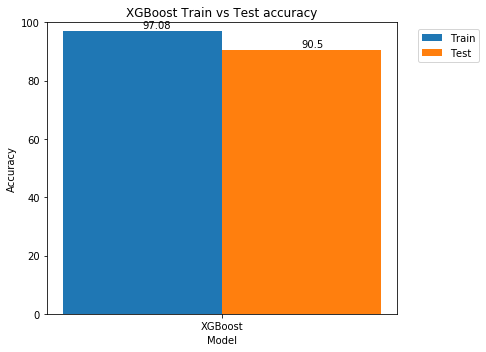

In [28]:
label = ['XGBoost']
#print(label)


x = np.arange(len(label))  
width = 0.35  


fig, ax = plt.subplots(figsize=(7, 5))
bar1 = ax.bar(x - width/2, train_score, width, label='Train')
bar2 = ax.bar(x + width/2, test_score, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('XGBoost Train vs Test accuracy')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.92))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()